In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("USA_cars_datasets.csv")
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
data.shape

(2499, 13)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2499.0,1.249000e+03,721.543484,0.0,624.5,1249.0,1873.5,2498.0
price,2499.0,1.876767e+04,12116.094936,0.0,10200.0,16900.0,25555.5,84900.0
year,2499.0,2.016714e+03,3.442656,1973.0,2016.0,2018.0,2019.0,2020.0
mileage,2499.0,5.229869e+04,59705.516356,0.0,21466.5,35365.0,63472.5,1017936.0
lot,2499.0,1.676914e+08,203877.210516,159348797.0,167625331.0,167745058.0,167779772.0,167805500.0


In [6]:
data.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [7]:
data[data.duplicated()]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


## US Cars Manifacturing Analysis

**1. Top 5 Car brands in terms of number of cars**

In [8]:
top5_brand = data['brand'].value_counts()
top5_brand = top5_brand[:5]
top5_brand

ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
Name: brand, dtype: int64

Text(0.5, 1.0, 'Top 5 Brand')

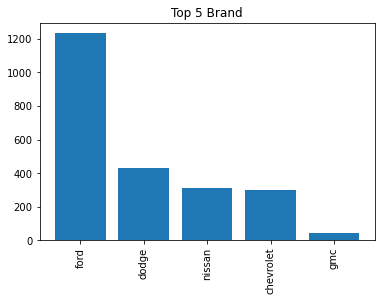

In [9]:
plt.bar(top5_brand.index ,top5_brand)
plt.xticks(rotation=90);

plt.title('Top 5 Brand')

**2.Car brand based on Frequency of Cars**

In [10]:
car_brand = data['brand'].value_counts()

Text(0.5, 1.0, 'Car Brand')

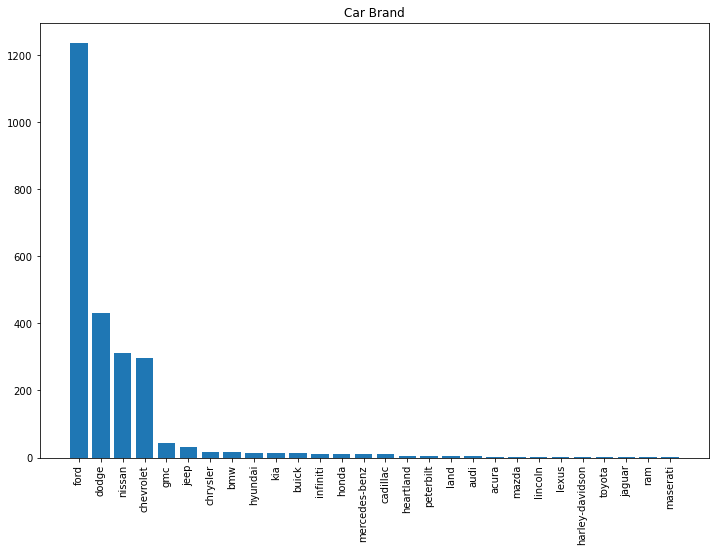

In [11]:
plt.figure(figsize=(12,8))

plt.bar(car_brand.index ,car_brand)

plt.xticks(rotation=90);
plt.title("Car Brand")

**3. Car Industry Trend**

In [12]:
year_trend = data['year'].value_counts().sort_index()

In [13]:
year_trend

1973      1
1984      1
1993      1
1994      2
1995      1
1996      2
1997      2
1998      4
1999      1
2000      4
2001      5
2002      2
2003      9
2004      6
2005      6
2006      8
2007      6
2008     18
2009     11
2010     13
2011     23
2012     72
2013     86
2014    104
2015    196
2016    203
2017    377
2018    395
2019    892
2020     48
Name: year, dtype: int64

Text(0.5, 1.0, 'Trend of Car Industry over years')

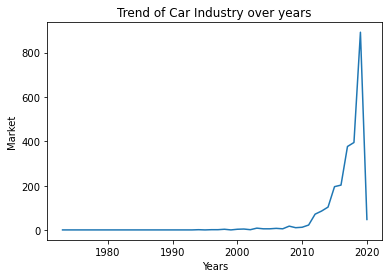

In [14]:
plt.plot(year_trend)

plt.xlabel("Years")
plt.ylabel("Market")

plt.title("Trend of Car Industry over years")

**4. Most Popular Car Colors**

In [15]:
color = data['color'].value_counts()
color

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
color:                                       5
beige                                        5
shadow black                                 5
ingot silver metallic                        4
oxford white                                 4
billet silver metallic clearcoat             3
super black                                  3
triple yellow

Text(0.5, 1.0, 'Car Color')

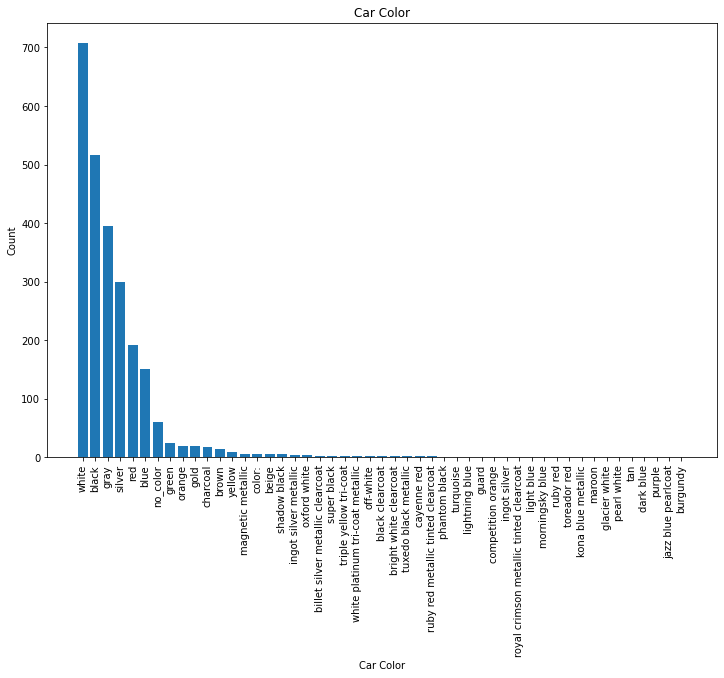

In [16]:
plt.figure(figsize=(12,8))

plt.bar(color.index ,color)

plt.xticks(rotation=90);

plt.xlabel('Car Color')
plt.ylabel('Count')
plt.title("Car Color")

**5. Which car brand is having Maximum Average Price**

In [17]:
max_avg_price = data.groupby('brand')['price'].mean()
max_avg_price = max_avg_price.sort_values(ascending=False)
max_avg_price

brand
harley-davidson    54680.000000
lexus              33220.000000
maserati           30300.000000
land               28900.000000
mercedes-benz      28704.000000
bmw                26397.058824
cadillac           24941.000000
ford               21666.888259
buick              19715.769231
chevrolet          18669.952862
lincoln            18150.000000
dodge              17781.988426
audi               13981.250000
chrysler           13686.111111
infiniti           13098.333333
nissan             12065.820513
kia                11123.846154
ram                11050.000000
jeep               10933.833333
gmc                10657.380952
mazda               8000.000000
acura               7266.666667
toyota              6300.000000
honda               6127.500000
hyundai             5203.200000
heartland           2966.000000
jaguar              2800.000000
peterbilt            400.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Brand  vs  Max. Avg. Price')

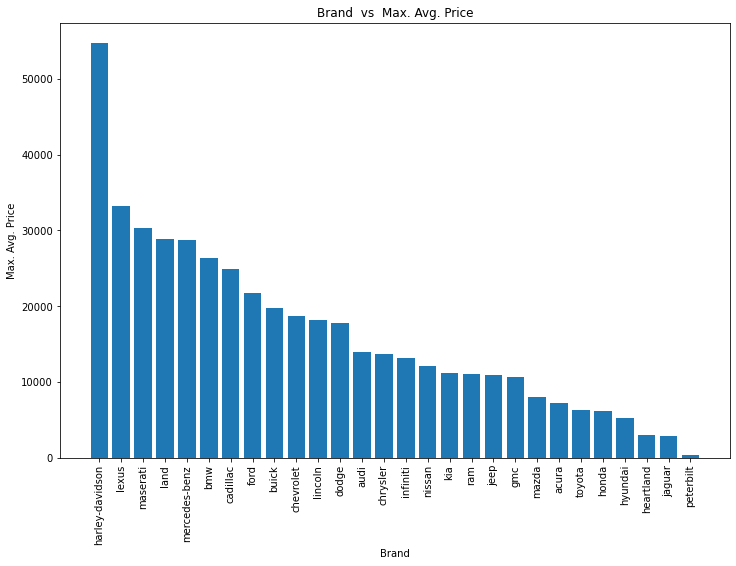

In [18]:
plt.figure(figsize=(12,8))

plt.bar(max_avg_price.index ,max_avg_price)

plt.xticks(rotation=90);

plt.xlabel('Brand')
plt.ylabel('Max. Avg. Price')
plt.title("Brand  vs  Max. Avg. Price")

**6. Which State is having most expensive cars**

In [19]:
data['price'].value_counts().sort_index(ascending = False)

84900     1
74000     1
70000     1
67000     1
65500     1
         ..
100       1
75        3
50        2
25       18
0        43
Name: price, Length: 790, dtype: int64

In [20]:
len(data['price'].unique())

790

In [21]:
state_car = data.groupby('state')['price'].mean()
state_car = state_car.sort_values(ascending = False)
state_car

state
kentucky          44969.444444
ontario           30357.142857
new mexico        27375.000000
washington        26771.428571
illinois          26715.707965
michigan          23899.822485
alabama           23872.058824
nevada            23653.529412
pennsylvania      22810.210702
indiana           21391.428571
nebraska          21350.000000
mississippi       21148.333333
wisconsin         21103.191489
virginia          20041.000000
oklahoma          19839.084507
minnesota         18207.352941
new york          17850.706897
california        17836.710526
rhode island      17808.000000
massachusetts     17650.555556
ohio              17460.967742
south carolina    17270.703125
new hampshire     16757.500000
north carolina    16485.273973
tennessee         16259.576923
new jersey        16209.712644
missouri          16192.391304
louisiana         16181.181818
georgia           16050.313725
kansas            15500.000000
west virginia     15447.619048
florida           15075.630081
co

Text(0.5, 1.0, ' State vs Most Expensive cars')

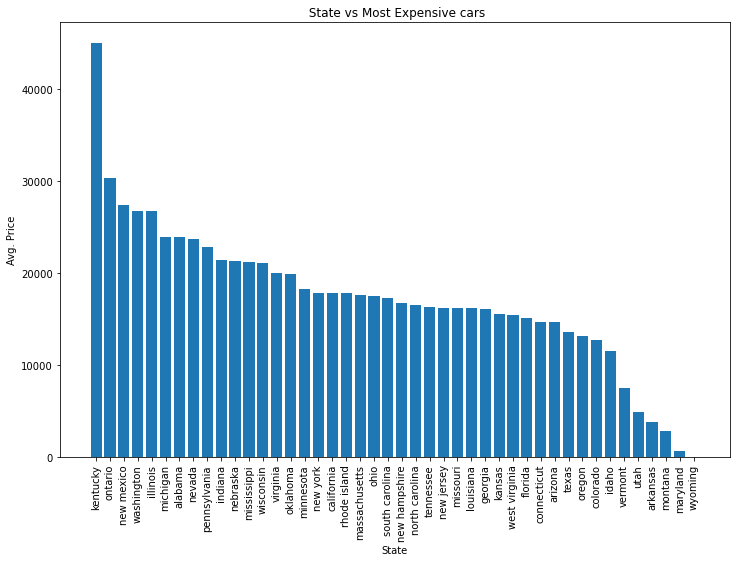

In [22]:
plt.figure(figsize=(12,8))

plt.bar(state_car.index ,state_car)

plt.xticks(rotation=90);

plt.xlabel('State')
plt.ylabel('Avg. Price')
plt.title(" State vs Most Expensive cars")